## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
(df.converted == 1).sum() / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# Finding users who got new_page but aren't part of treatment group
bad_treatment = df.query('landing_page == "new_page" and group != "treatment"')
bad_treatment.shape

(1928, 5)

In [8]:
# Finding users who got old_page but aren't part of control group
bad_control = df.query('landing_page == "old_page" and group != "control"')
bad_control.shape

(1965, 5)

In [9]:
# total mismatched entries
bad_control.shape[0] + bad_treatment.shape[0]

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows have any missing values!

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.drop(bad_treatment.index, axis=0)
df2 = df2.drop(bad_control.index, axis=0)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.shape

(290585, 5)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop(1899, axis=0)

In [18]:
sample_size = df2.shape[0]
sample_size

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
num_converted = (df2.converted == 1).sum()
converted_rate = num_converted / sample_size
converted_rate

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df_control = df2.query('group == "control"')
converted_rate_control = (df_control.converted == 1).sum() / df_control.shape[0]
converted_rate_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df_treated = df2.query('group == "treatment"')
converted_rate_treatment = (df_treated.converted == 1).sum() / df_treated.shape[0]
converted_rate_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
(df2.landing_page == "new_page").sum() / sample_size

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

tl;dr there is **insufficient evidence** to conclude that the new treat page leads to more conversions. 

The probability that an individual in the **control group** converts is **12.04%** whereas the probability that an individual in the **treatment group** converts is **11.89%**. 

By simple numbers this shows that the treatment group doesn't do any better, and in fact does worse than the control group and hence the conversions are better with the control group. 

From a practicality point, this difference is anyway too small to be significant and make any conclusions, and hence it is better to leave the current page as it is.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

Null Hypothesis: The converted rates for the new page is worse than or equal to the converted rates for the old page.
Alternative Hypothesis: The converted rates for the new page is better than the converted rates for the old page.

**or**

$H_{0}: p_{new} - p_{old} \leqslant 0$ <br>
$H_{1}: p_{new} - p_{old} > 0$

All observations at a Type 1 error rate of 5%

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [23]:
# let us draw samples from the sample data
# calculate the conversion rate for control vs treatment
# store its difference as the sampling distribution
# do this for 10000 iterations
diffs = []
conv_new = []
conv_old = []

# for _ in range(10000):
#     df_sample = df.sample(sample_size, replace=True)

#     df_sample_ctr = df_sample.query('group == "control"')
#     sample_ctr_conv = (df_sample_ctr.converted == 1).sum() / df_sample_ctr.shape[0]
#     conv_old.append(sample_ctr_conv)
    
#     df_sample_trt = df_sample.query('group == "treatment"')
#     sample_trt_conv = (df_sample_trt.converted == 1).sum() / df_sample_trt.shape[0]
#     conv_new.append(sample_trt_conv)
    
#     diff_conv = sample_trt_conv - sample_ctr_conv
#     diffs.append(diff_conv)


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
# under the null, conversion rate for p_new is the same as the average
p_new = converted_rate
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
# under the null, conversion rate for p_old is the same as the average
p_old = converted_rate
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df_treated.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df_control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
# new_page_converted = np.random.binomial(n_new, p_new, 10000).mean()
new_page_converted = np.random.choice([0,1], n_new, [1-p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
# old_page_converted = np.random.binomial(n_old, p_old, 10000).mean()
old_page_converted = np.random.choice([0,1], n_old, [1-p_old, p_old])
old_page_converted

array([0, 1, 0, ..., 1, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
# p_new = new_page_converted.mean() / n_new
# p_old = old_page_converted.mean() / n_old
psim_new = new_page_converted.sum() / new_page_converted.size
psim_old = old_page_converted.sum() / old_page_converted.size
p_new, p_old

(0.11959708724499628, 0.11959708724499628)

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    new_cvr = np.random.choice([0,1], n_new, [1-p_new, p_new])
    old_cvr = np.random.choice([0,1], n_old, [1-p_old, p_old])
    new_p = new_cvr.sum() / new_cvr.size
    old_p = old_cvr.sum() / old_cvr.size
    p_diffs.append(new_p - old_p)

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

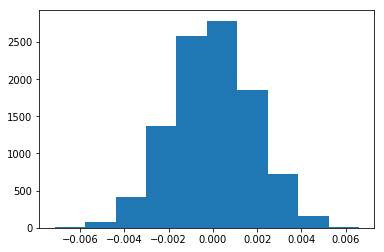

In [32]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
obs_diff = converted_rate_treatment - converted_rate_control
(p_diffs > obs_diff).sum() / p_diffs.size

0.8034

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer** <br>
We have just computed the p-value for the sampling distribution holding the assumption that the null is true. <br>

**p-value = 0.80**

The p-value indicates the probability of observing the statistic given the null hypothesis is true. Since the p-value is high, it shows that there is a high probability of the null being true and hence we **fail to reject the null**.

We can conclude from this that there is no difference between the old and new pages, specifically, the new pages have not increased the conversion rate as compared to the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
from statsmodels.stats.proportion import proportions_ztest

conv_old = (df_control.converted == 1).sum()
conv_new = (df_treated.converted == 1).sum()

conv_old, conv_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
trials = np.array([n_old, n_new])
successes = np.array([conv_old, conv_new])

stat, pval = proportions_ztest(count=successes, nobs=trials, alternative="smaller")
stat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

*z-score = 1.31* <br>
**p-value = 0.91**

The p-value of 0.91 indicates that there is a high probability the the value selected falls within the null, where the null is that the conversion rate with the treatment applied is equal to or less than the conversation rate of the control group. Hence with such a high p-value, we **fail to reject the null**.

The z-score indicate similarly; the selected values fall within 1.31 standard deviations from the mean and the *P(z < 1.31) = 0.9049* <br>

While the interpretetation of the values are similar to the findings in j and k - failing to reject the null, the values themselves are not the same and there is a slight difference in the p-values computed using the two methods. 



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**
Since the outcome is a boolean, we will be using Logistic Regression in this case. The output of the Logistic regression will indicate the probability of the result being a conversion or not.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# add an intercept and create a dummy from the group column.
# We need one dummy column for the 2 values in this column
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group).treatment
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
import statsmodels.api as sm
res = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:33:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [39]:
# checking the influence of ab_page by raise the coefficient to e.
ab = 1/np.exp(-0.0150)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

**p-value = 0.190**<br>

Previously the p-value calcualted was ~0.80 for the probability of the difference between the conversion rate of the treatment and the conversion rate of the control under the null assumption that there was no difference. 

With the regression model, we are calculating the likelihood that presenting the new landing page to the treatment user will have on the conversion rate of that user. In this case the p-value of 0.190 is sufficiently high that we can say that the treatment does not have a significant effect on the conversion rate.

In fact the treatment page **decreses** the likelihood of a conversion by a **factor of 1.015**. (which is basically not much of a difference at all)

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
From the current data, or predictor variables, we see that there is no significant change to the response variable. This means that either the treatment is not having sufficient effect, or that we are not measuring the right factors. There may other factors that definitely could influence conversions such as time spent on the page, weekdays / weekends.

In fact if there are other data available, it might be a good idea to consider other factors and add them to the regression model. This will give a better predictor as to what might change the conversion rates, or whether there are other factors than the landing page itself that influences the conversion rates. 

The thing to consider while adding additional terms to the regression model is of course the multi-collinearity between the independent variables. Some of them might be dependent on each other and show a correlation betweeen each other thereby affecting the results of the regression model. These have to be checked for and dropped from the factors for the regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# set the indexes of both dataframes to 'user_id' and join
dfj = df2.set_index('user_id').join(dfc.set_index('user_id'))

# reset the index and check results
dfj = dfj.reset_index()
dfj.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
# identify the unique values in the country column
dfj.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
dfj = dfj.join(pd.get_dummies(dfj.country))
dfj.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [44]:
res1 = sm.Logit(dfj['converted'], dfj[['intercept', 'CA', 'UK']]).fit()
res1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:               1.521e-05
Time:                        15:33:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [45]:
ca = 1 / np.exp(-0.0408)
uk = np.exp(0.0099)

ca, uk

(1.0416437559600236, 1.0099491671175422)

**Observation**
From the p-values, we see that the country isn't a very useful predictor of conversion. All other factors being held the same, a user being in US or UK has little to no difference in whether they convert or not. The country being CA seems to have a better p-value, however on evaluating the coefficient, we can see that a user from CA is about 4% less likely to convert as compared to a user from the US, all other factors kept constant. This is practically not that useful.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
res2 = sm.Logit(dfj['converted'], dfj[['intercept', 'ab_page', 'CA', 'UK']]).fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        15:37:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Observation**
The results of the combined regression including the factors of treatment as well as country, indicate the same results as when the 2 factors were considered separately. 

The p-values are on the statistically higher side to be of any significance to indicate that those factors have much influence on the conversion rates. Even though the values for ab_page and CA seems low, it is higher than an alpha value of 0.05.

The coefficients of the 2 factors that we have considered (treatment and country) are very low and hence no statistically significant correlation can be made from these factors. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0